In [1]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Getting Data Analyst Roles in the USA into own Data Frame
df_DA_USA = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == 'United States')].copy()

# Removing NA Values for Plotting
df_DA_USA = df_DA_USA.dropna(subset=['salary_year_avg'])

In [ ]:
# Just looking at sample of Data to see what spread we are looking at in a quick snapshot
df_DA_USA['salary_year_avg'].sample(20)

751511     95000.0
381443    102500.0
759038     62500.0
619945    122000.0
594181    125000.0
72247     107500.0
693577     90000.0
498976    115800.0
294820    100000.0
112031     75000.0
306502     62004.0
472994     90300.0
292953    115000.0
252966     90000.0
178605     75000.0
139968    111175.0
345235     66250.0
392258     70000.0
763818    120000.0
679070     57500.0
Name: salary_year_avg, dtype: float64

<Axes: >

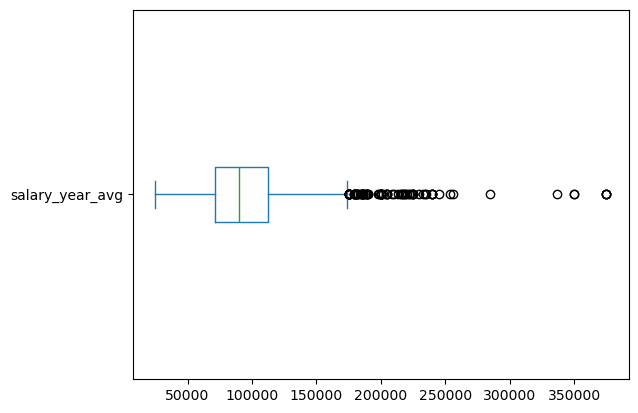

In [8]:
df_DA_USA['salary_year_avg'].plot(kind='box', vert=False)

In [16]:
# Making a BoxPlot that is for Data Analysts, Data Scientists, and Data Engineer Jobs
# First make a list that contains those job titles in it
job_titles = ["Data Analyst", "Data Scientist", "Data Engineer"]

# Next filter and make a Data Frame that is for those 3 Job Titles and is in the USA
df_USA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

# Remove NaN Values
df_USA = df_USA.dropna(subset=['salary_year_avg'])

C:\Users\shawn\AppData\Local\Temp\ipykernel_7832\1559045370.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


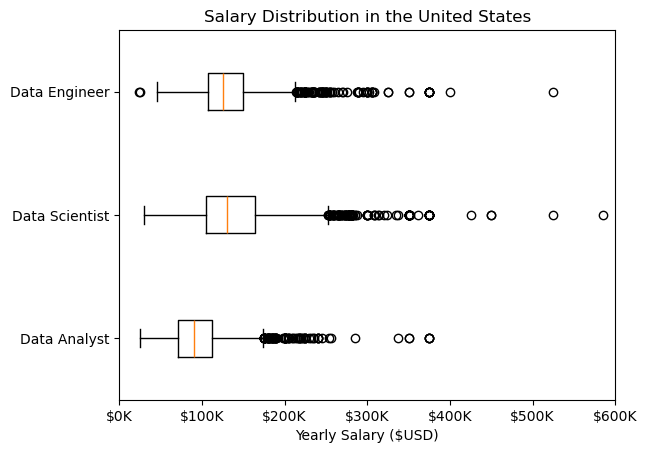

In [23]:
# Creating a Job List to pass into the Boxplot Function
job_list = [df_USA[df_USA['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

# Plotting the Box Plots
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()